In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# fix the random seed value so generated distributions will always be the same
np.random.seed(42)

### Histogram vs barchart

Let's say we have a dataset of 200 people of age between 20 and 45 stored as integers.

In [2]:
# generate an array of integer values
age_int = np.random.randint(low=20, high=45, size=200)
age_int[:50]

array([26, 39, 34, 30, 27, 40, 26, 38, 42, 30, 30, 43, 40, 23, 27, 43, 22,
       41, 40, 21, 43, 31, 25, 21, 40, 20, 31, 41, 31, 44, 36, 29, 35, 34,
       34, 38, 31, 42, 39, 44, 22, 24, 38, 26, 40, 28, 26, 37, 23, 44])

To make sense of this data we can visualize it with a bar chart.

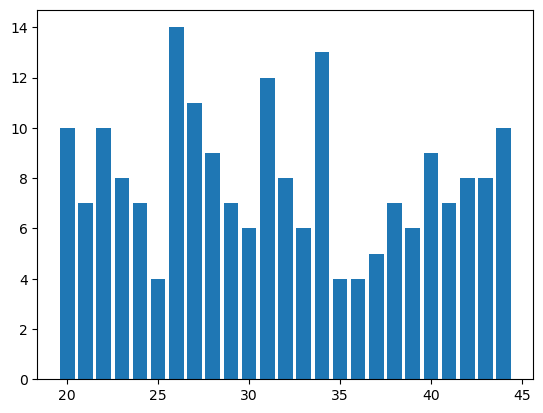

In [3]:
# count each unique age value, similar to `value_counts()` in pandas
labels, counts = np.unique(age_int, return_counts=True)

# plot the counts for each age
plt.bar(x=labels, height=counts);

Here, we split values into groups and calculated the size of each. 
This is what  a histogram does with the main difference being that in a histogram we can control the size of groups (aka bins).

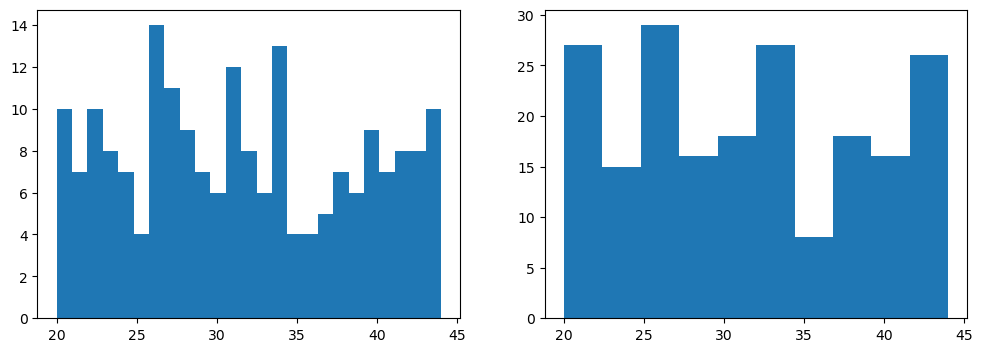

In [4]:
plt.figure(figsize=(12, 4))
# histogram with the same bins size as there are unique labels
plt.subplot(121)
plt.hist(age_int, bins=25)
# histogram with smaller bins size
plt.subplot(122)
plt.hist(age_int, bins=10);

### Histograms allow as to visualize continuous data

Continuous data is also not a problem with histograms. Let's say that our age data stored not just as integers, but with decimal part as well.

In [5]:
# modify the array to add decimal part
age_float = age_int + np.random.random(200).round(2)
age_float[:50]

array([26.22, 39.56, 34.4 , 30.06, 27.25, 40.25, 26.7 , 38.71, 42.15,
       31.  , 30.27, 43.98, 40.41, 23.03, 27.35, 43.63, 22.68, 41.53,
       40.45, 21.55, 43.59, 31.08, 25.37, 21.24, 40.8 , 20.47, 31.98,
       41.4 , 31.82, 44.8 , 36.15, 29.51, 35.7 , 34.86, 34.33, 38.22,
       31.71, 42.81, 39.35, 44.1 , 22.94, 24.4 , 38.52, 26.84, 40.68,
       28.74, 26.21, 37.54, 23.7 , 44.23])

The bar chart will not work here since all labels now will be unique. But with a histogram, nothing really changes.
We can count the number of values in each group the same way we did it before.

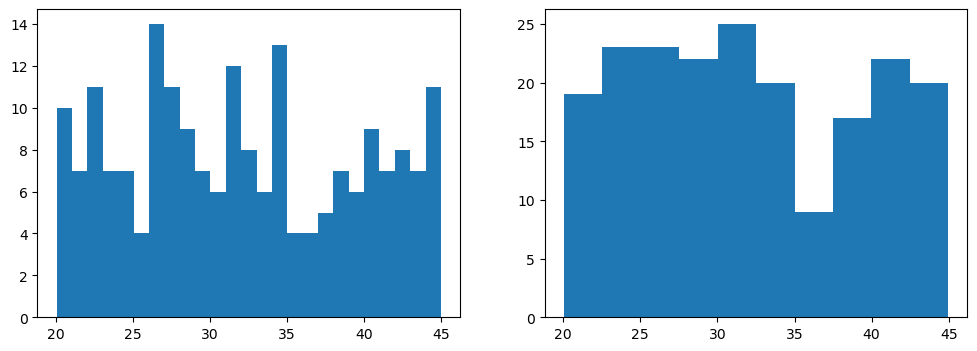

In [6]:
plt.figure(figsize=(12, 4))
# histogram with the same bins size as there are unique labels
plt.subplot(121)
plt.hist(age_float, bins=25)
# histogram with smaller bins size
plt.subplot(122)
plt.hist(age_float, bins=10);

### Using Boxplot + Violinplot

In [7]:
data = pd.read_csv("data/games.csv")
data.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


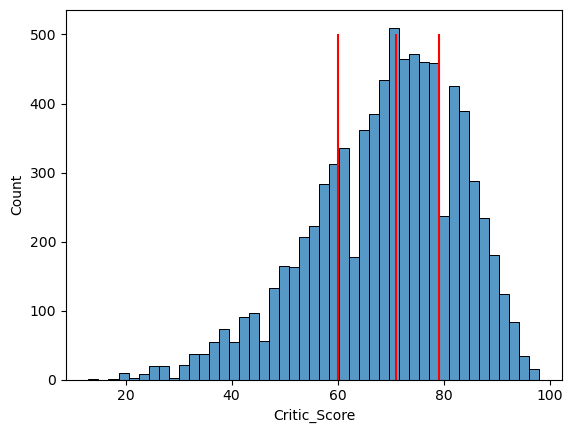

In [8]:
sns.histplot(data, x="Critic_Score");
plt.vlines(data["Critic_Score"].quantile(.25), 0, 500, "red")
plt.vlines(data["Critic_Score"].quantile(.5), 0, 500, "red")
plt.vlines(data["Critic_Score"].quantile(.75), 0, 500, "red")

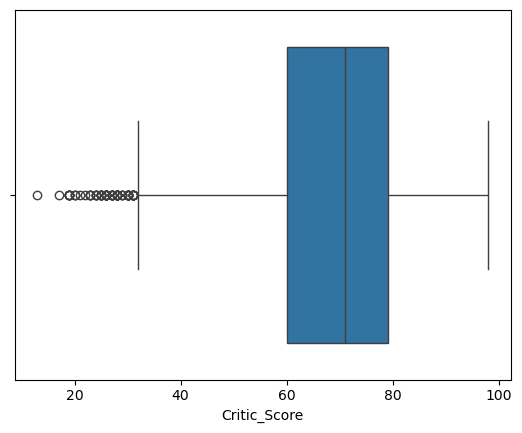

In [9]:
sns.boxplot(data, x="Critic_Score");

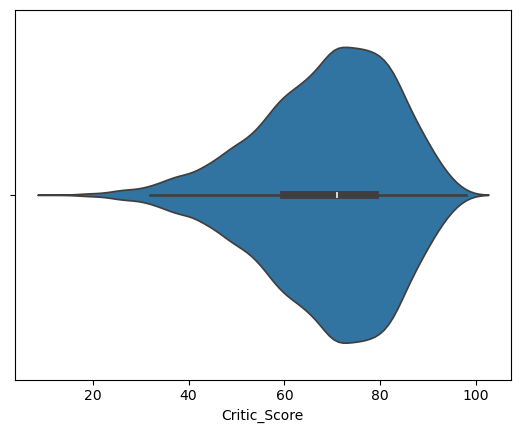

In [10]:
sns.violinplot(data, x="Critic_Score");